In [37]:
%matplotlib inline
import quandl as qn
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
import warnings
warnings.filterwarnings("ignore")

qn.ApiConfig.api_key = "HQV7bdPFvAn1QUxxkN5c"
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)


# Blind source separation using FastICA


An example of estimating sources from noisy data.

`ICA` is used to estimate sources given noisy measurements.
Imagine 3 instruments playing simultaneously and 3 microphones
recording the mixed signals. ICA is used to recover the sources
ie. what is played by each instrument. Importantly, PCA fails
at recovering our `instruments` since the related signals reflect
non-Gaussian processes.




In [38]:
Data=[]
Companies=["EOD/GOOGL","EOD/FB","EOD/AAPL"] #,"EOD/AMZN"]
InitDate="2012-05-20"
EndDate="2017-12-01"
for company in Companies:
    data=qn.get(company, start_date=InitDate, end_date=EndDate,collapse="daily", transformation='rdiff')
    Data.append(data['Close'])

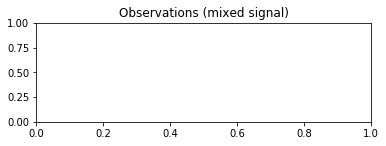

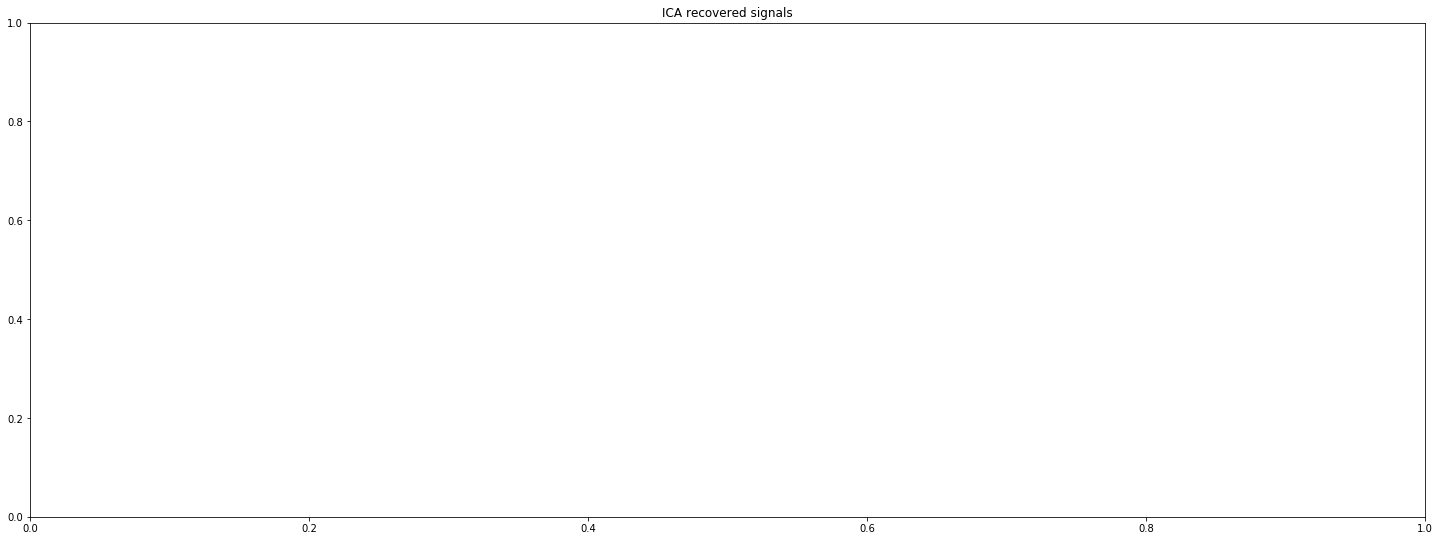

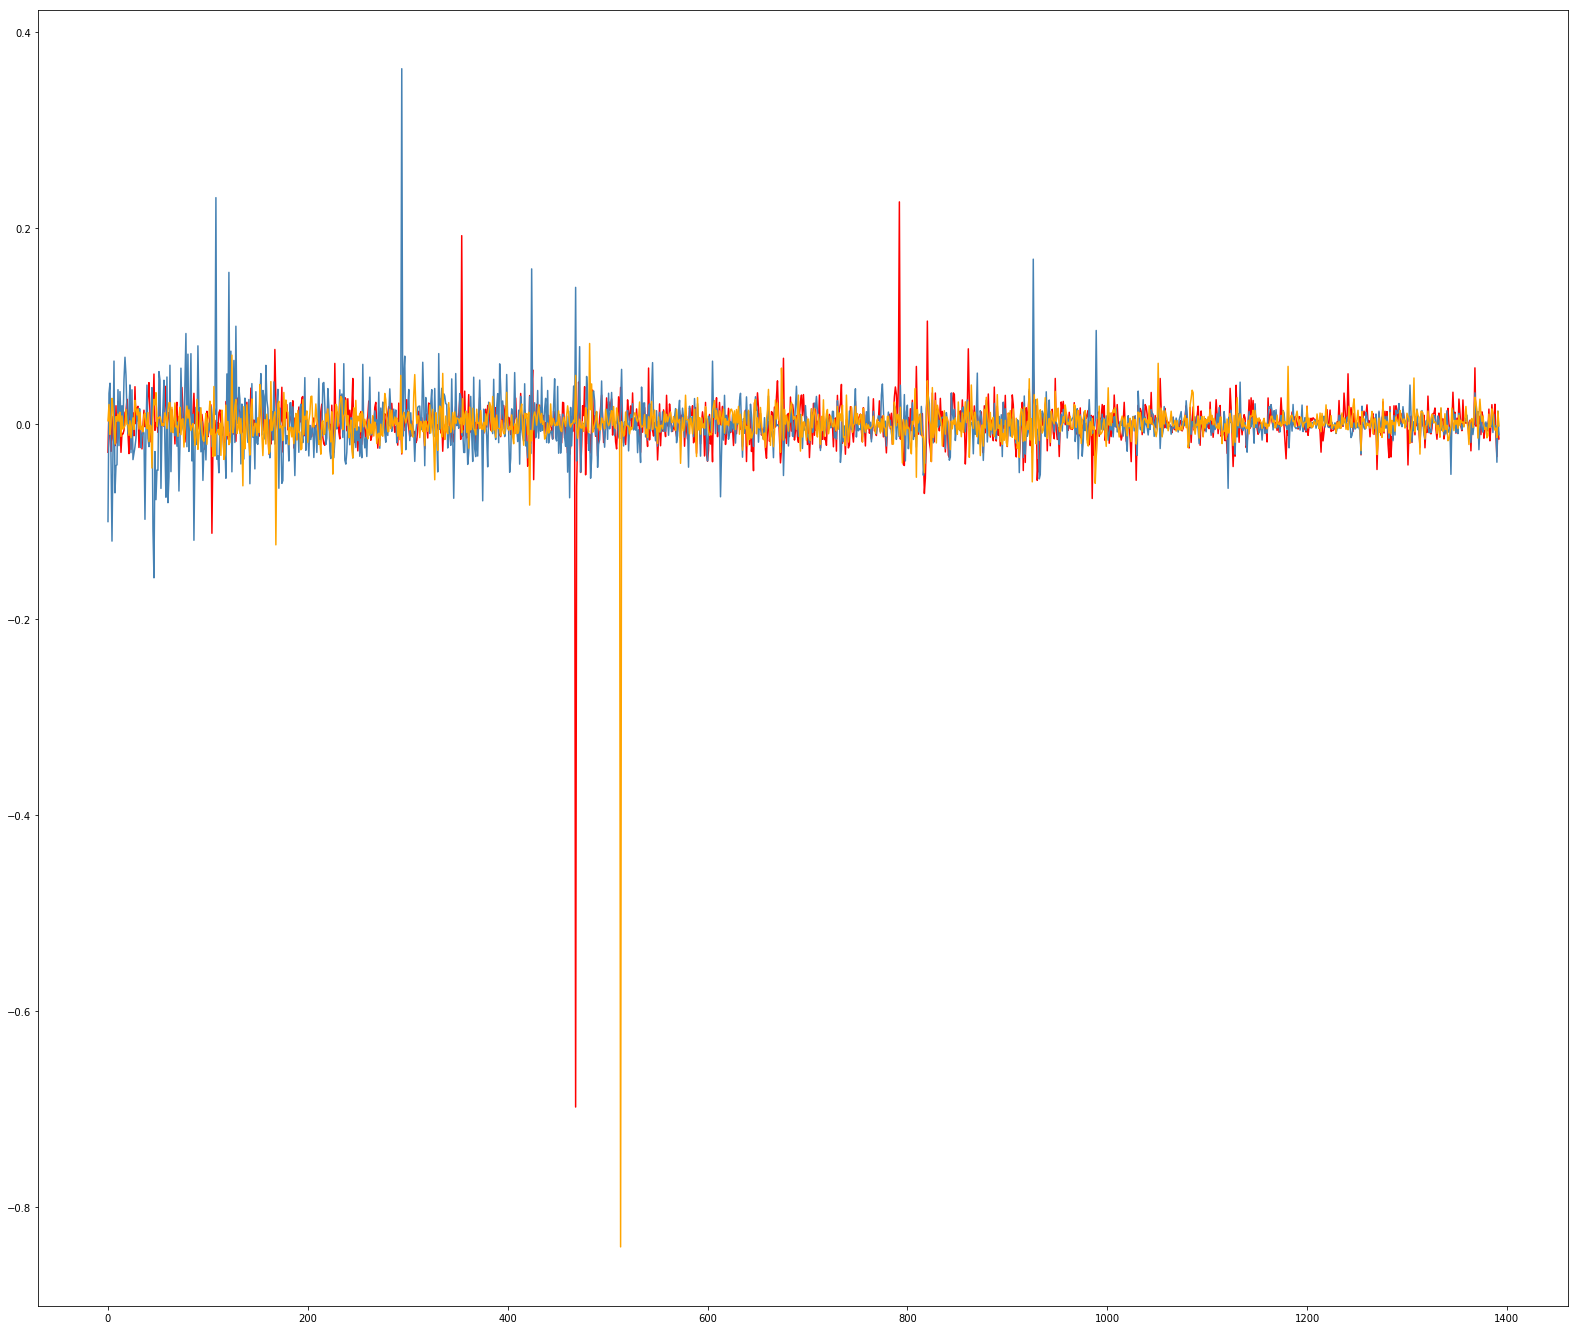

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1=np.asarray(Data[0])
s2=np.asarray(Data[1])
s3=np.asarray(Data[2])

S = np.c_[s1, s2, s3]

#S = [1,1,1,1] #np.random.rand(100)

#X = np.asarray(S)

#X = S[np.isnan(S)]
#X = S[np.isfinite(S)]

#S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
#A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

#X = S
# Compute ICA
ica = FastICA(n_components=4)
S_ = ica.fit_transform(X)

# Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA

#pca = PCA(n_components=3)
#H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S_]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']



for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 1, ii)
    plt.title(name)
    plt.figure(figsize=(25,20))
    for sig, color in zip(model.T, colors):
        #plt.figure(figsize=(25,20))
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.figure(figsize=(25,20))
plt.show()